# Find optimal threshold for Binary Classification using ROC curve 

In [3]:
# import required library 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [4]:
# import make_classification to help on generating a dataset for classfication problem 
from sklearn.datasets import make_classification
x,y = make_classification(n_samples=2000,n_classes=2, weights=[1,1], random_state=1)
x.shape # 2000 records, 20 features (by default), 2 output labels, and balanced dataset by same weight

(2000, 20)

In [5]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [7]:
# train, test split 
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=1)

### Random Forest 

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(x_train,y_train)
ytrain_pred = rf_model.predict_proba(x_train)
ytrain_pred # the probabilities of the target being class 0 and class 1

array([[0.99, 0.01],
       [0.98, 0.02],
       [0.02, 0.98],
       ...,
       [0.98, 0.02],
       [0.99, 0.01],
       [0.32, 0.68]])

In [13]:
print('RF train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,-1])))
#Since class 1 is typically considered the event of interest, we use the probabilities that 
#the samples belong to class 1 to compute the ROC-AUC score.
ytest_pred = rf_model.predict_proba(x_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,-1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9831666666666666


### Logistic Regression 

In [17]:
from sklearn.linear_model import LogisticRegression 
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
ytrain_pred = log_model.predict_proba(x_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,-1])))
ytest_pred = log_model.predict_proba(x_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,-1])))

Logistic train roc-auc: 0.9863589331232614
Logistic test roc-auc: 0.9885777777777777


### Adaboost Classifier 

In [20]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier(algorithm='SAMME')
ada_model.fit(x_train,y_train)
ytrain_pred = ada_model.predict_proba(x_train)
print('AdaBoost train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,-1])))
ytest_pred = ada_model.predict_proba(x_test)
print('AdaBoost test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,-1])))

AdaBoost train roc-auc: 0.9926743552432595
AdaBoost test roc-auc: 0.9794888888888889


### KNN Classifier 

In [23]:
from sklearn.neighbors import KNeighborsClassifier 
knn_model = KNeighborsClassifier()
knn_model.fit(x_train,y_train)
ytrain_pred = knn_model.predict_proba(x_train)
print('KNN train roc-auc: {}'.format(roc_auc_score(y_train,ytrain_pred[:,-1])))
ytest_pred = knn_model.predict_proba(x_test)
print('KNN test roc-auc: {}'.format(roc_auc_score(y_test,ytest_pred[:,-1])))

KNN train roc-auc: 0.981670071491109
KNN test roc-auc: 0.9426111111111111


## Now we will focus on slecting the best threshold for maximum accuracy 

In [26]:
pred = []
for model in [rf_model,log_model,ada_model,knn_model]:
    pred.append(pd.Series(model.predict_proba(x_test)[:,-1]))
final_pred = pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_pred)))

Ensemble test roc-auc: 0.9852444444444444


In [27]:
pd.concat(pred,axis=1) #concat each model result into columns using axis=1

,0,1,2,3
0,1.00,0.991873,0.669528,1.0
1,0.02,0.000008,0.316455,0.0
2,0.99,0.966763,0.632138,0.8
3,0.94,0.761896,0.533171,0.8
4,0.58,0.779209,0.440650,0.4
...,...,...,...,...
595,0.03,0.024263,0.321128,0.0
596,0.05,0.000003,0.262749,0.0
597,0.98,0.984400,0.605074,1.0
598,0.00,0.001157,0.266081,0.2


In [30]:
final_pred #mean of 4 models 

0      0.915350
1      0.084116
2      0.847225
3      0.758767
4      0.549965
         ...   
595    0.093848
596    0.078188
597    0.892368
598    0.116810
599    0.859932
Length: 600, dtype: float64

In [32]:
fpr,tpr,threshold = roc_curve(y_test,final_pred)
threshold

array([       inf, 0.92543555, 0.91122892, 0.91085577, 0.81544064,
       0.81491304, 0.81167517, 0.81158135, 0.81143614, 0.80961355,
       0.78710151, 0.78587021, 0.73418589, 0.73195217, 0.72375234,
       0.72109565, 0.69208281, 0.68997295, 0.59946969, 0.59633457,
       0.58635299, 0.58367231, 0.58330144, 0.58050184, 0.57496822,
       0.574893  , 0.57206678, 0.56899768, 0.56822548, 0.56598082,
       0.54783762, 0.54345293, 0.46696984, 0.46619513, 0.45992217,
       0.45644019, 0.4477096 , 0.42230819, 0.42098027, 0.36662446,
       0.35042692, 0.33351662, 0.33248471, 0.22429285, 0.21865762,
       0.21702414, 0.21218852, 0.17700861, 0.17659164, 0.08904215,
       0.08877288, 0.05152849])

In [34]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
# for each threshold, run through final_pred, make classification, and calculate the accuracy
for thres in threshold:
    y_pred = np.where(final_pred>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))
accuracy_ls = pd.concat([pd.Series(threshold), pd.Series(accuracy_ls)],axis=1)
accuracy_ls.columns = ['threshold','accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,threshold,accuracy
37,0.422308,0.960000
35,0.456440,0.960000
33,0.466195,0.960000
38,0.420980,0.958333
36,0.447710,0.958333


### Then select the first threshold as the optimal threshold 

In [37]:
# Can also see this through the ROC curve 
def plot_roc_curve(fpr,tpr):
    plt.plot(fpr,tpr,color = 'red', label = 'ROC')
    plt.plot([0,1],[0,1],color = 'black',linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve (ROC)')
    plt.legend()
    plt.show()

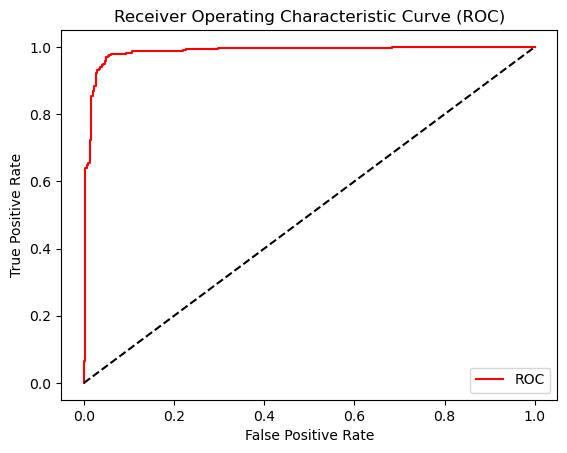

In [39]:
plot_roc_curve(fpr,tpr)